-----------Q4(a)----------
MU0: [-0.75529433  0.68509431]
MU1: [ 0.75529433 -0.68509431]
SIgma0 = Sigma1 = Sigma:
 [[ 0.42953048 -0.02247228]
 [-0.02247228  0.53064579]]


-----------Q4(b)----------


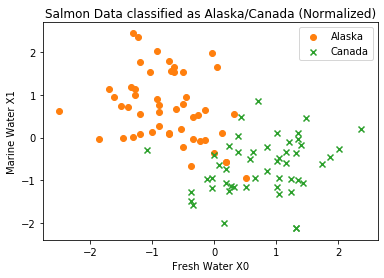



-----------Q4(c)----------
MU0: [-0.75529433  0.68509431]
MU1: [ 0.75529433 -0.68509431]


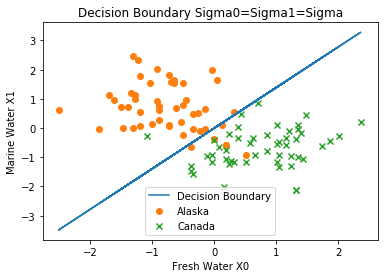



-----------Q4(d)----------
MU0: [-0.75529433  0.68509431]
MU1: [ 0.75529433 -0.68509431]
Sigma0:
 [[ 0.38158978 -0.15486516]
 [-0.15486516  0.64773717]]
Sigma1:
 [[0.47747117 0.1099206 ]
 [0.1099206  0.41355441]]


-----------Q4(e)----------


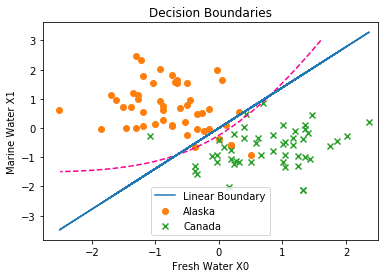

In [6]:
'''
************************************************
** COL774 Machine Learning
** Assignment 1
** Question 4: Gaussian Discriminant Analysis
** @Author: Aman Bhardwaj
** @Entry No. 2019SIY7580
** @Date: 7 Feb 2020
************************************************
'''

import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import cm
import time

'''#Normalize Data Array'''
def normalize(x):
    mean = np.mean(x)
    stanDev = np.std(x)
    #print(mean, stanDev)
    #print(x)
    for i in range(len(x)):
        #print(x[i] - mean)
        x[i] = (float(x[i]) - float(mean)) / float(stanDev)
        #print(x[i])
    return x

#Load Data
xdf = pa.read_table('q4x.dat',sep='\s+',header=None) 
ydf = pa.read_table('q4y.dat',sep='\s+',header=None)

xdf.astype(float)

x = np.array(xdf)
y = np.array(ydf)
x = x.astype(float)
x[:,0] = normalize(x[:,0])
x[:,1] = normalize(x[:,1])

#separate Data by Label
xA = x[:50]
xC = x[50:]


'''Calculate Parameters'''
def computeParameters():
    MU0 = np.mean(xA , axis = 0)
    print("MU0:",MU0)
    MU1 = np.mean(xC , axis = 0)
    print("MU1:",MU1)
    
    xATemp = xA - MU0
    xCTemp = xC - MU1
    
    xTemp = np.c_[xATemp.T, xCTemp.T].T
    
    SIG = np.dot(xTemp.T, xTemp)/len(xTemp)
    print("SIgma0 = Sigma1 = Sigma:\n", SIG)
    return

'''Plot Input Data'''
def plotInputData():
    fig = plt.figure(1)
    plt.scatter(xA[:,0],xA[:,1], marker='o', c='tab:orange', label="Alaska")
    plt.scatter(xC[:,0],xC[:,1], marker='x', c='tab:green', label="Canada")
    plt.legend()
    plt.title("Salmon Data classified as Alaska/Canada (Normalized)")
    plt.xlabel("Fresh Water X0")    
    plt.ylabel("Marine Water X1")
    plt.show()
    fig.savefig("plots/q4_b_input_data.png", dpi= 300, pad_inches=0.1, format='png')
    return

linearBoundry = []

'''Compute Decision Boundary in case of sigme0 = sigma1 = sigma'''
def computeLinearDecisionBoundry(phi):
    MU0 = np.mean(xA , axis = 0)
    print("MU0:",MU0)
    MU1 = np.mean(xC , axis = 0)
    print("MU1:",MU1)
    
    xATemp = x - MU0
    xCTemp = x - MU1
    
    xTemp = np.c_[xATemp.T, xCTemp.T].T
    
    SIG = np.dot(xTemp.T, xTemp)/len(xTemp)
    phiDash = phi / (1-phi)
    sigInv = np.linalg.inv(SIG)
    
    m = 2*np.array([(MU1 - MU0) @ sigInv])
    
    c = (MU1 @ sigInv @MU1.T) - (MU0 @ sigInv @MU0.T)
    
    y = m[:,0]*x[:,0]
    y = c - y
    y = y / m[:,1]
    
    for t in y:
        linearBoundry.append(t)
    fig = plt.figure(2)
    plt.scatter(xA[:,0],xA[:,1], marker='o', c='tab:orange', label="Alaska")
    plt.scatter(xC[:,0],xC[:,1], marker='x', c='tab:green', label="Canada")
    plt.title("Decision Boundary Sigma0=Sigma1=Sigma")
    plt.xlabel("Fresh Water X0")    
    plt.ylabel("Marine Water X1")
    plt.plot(x[:,0], y.T, label='Decision Boundary')
    plt.legend()
    plt.show()
    fig.savefig("plots/q4_c_linear_decision_boundary.png", dpi= 300, pad_inches=0.1, format='png')
    return

'''Calculate parameters when sigme0 != sigma1 i.e general case'''
def computeGenCaseParams():
    MU0 = np.mean(xA , axis = 0)
    print("MU0:",MU0)
    MU1 = np.mean(xC , axis = 0)
    print("MU1:",MU1)
    
    xATemp = xA - MU0
    xCTemp = xC - MU1
    
    
    SIG0 = np.dot(xATemp.T, xATemp)/len(xATemp)
    SIG1 = np.dot(xCTemp.T, xCTemp)/len(xCTemp)
    print("Sigma0:\n", SIG0)
    print("Sigma1:\n", SIG1)
    return MU0, MU1, SIG0, SIG1

'''Compute general case decision boundary'''
def computeDecisionBoundry(mu0, mu1, sig0, sig1, phi, X):
    sigInv1 = np.linalg.inv(sig1) #sigma inverse
    sigInv0 = np.linalg.inv(sig0)
    boundry = []
    
    xTemp0 = X - mu0
    xTemp1 = X - mu1
    boundryPoint = 0.5*((xTemp0 @ sigInv0 @ xTemp0.T)-(xTemp1 @ sigInv1 @ xTemp1.T)) 
    + np.log(phi/(1-phi))
    - 0.5*np.log(np.linalg.det(sig0)/np.linalg.det(sig1))
    
    return boundryPoint

'''Plot general case decision boundary'''
def plotDecisionBoundry(mu0, mu1, sig0, sig1, phi):
    
    #Mesh for contour Plot
    yGrid = np.linspace(-3,3,100)
    xGrid = np.linspace(-2.5,2.5,100)
    xGrid, yGrid = np.meshgrid(xGrid, yGrid)
    
    boundryValues = []
    J = np.zeros(xGrid.shape)
    
    xValues = np.array([xGrid.flatten(), yGrid.flatten()])
    xValues = xValues.T
    
    for row in xValues:
        val = computeDecisionBoundry(mu0, mu1, sig0, sig1, 0.5, row )
        boundryValues.append(val)
        
    J = np.array(boundryValues).reshape(100,100)
    figC = plt.figure(3)
    plt.scatter(xA[:,0],xA[:,1], marker='o', c='tab:orange', label="Alaska")
    plt.scatter(xC[:,0],xC[:,1], marker='x', c='tab:green', label="Canada")
    plt.contour(xGrid, yGrid, J, levels=[0], colors ='#fc0390', linestyles="--")
    #lbl = plt.mlines.Line2D(c='tab:brown', label="Quadratic Boundry")
    plt.plot(x[:,0], linearBoundry, label="Linear Boundary")
    plt.title("Decision Boundaries")
    plt.xlabel("Fresh Water X0")    
    plt.ylabel("Marine Water X1")
    plt.legend()
    plt.show()
    figC.savefig("plots/q4_e_quad_decision_boundary.png", dpi= 300, pad_inches=0.1, format='png')
    return
    
'''Main()'''
if __name__ == "__main__":
    #------------Q4.a-------------#
    print('-----------Q4(a)----------')
    computeParameters()
    
    #------------Q4.b-------------#    
    print('\n\n-----------Q4(b)----------')
    plotInputData()
    
    #------------Q4.c-------------#
    print('\n\n-----------Q4(c)----------')
    computeLinearDecisionBoundry(0.5)
    
    #------------Q4.d-------------#
    print('\n\n-----------Q4(d)----------')
    MU0, MU1, SIG0, SIG1 = computeGenCaseParams()
    
    #------------Q4.e-------------#
    print('\n\n-----------Q4(e)----------')
    plotDecisionBoundry(MU0, MU1, SIG0, SIG1, 0.5)